DOMAIN: Automobile

The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5 continuous attributes using K-means Clustering by applying on the Car Dataset to segment the cars into various categories.

In [ ]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Understanding & Exploration**

**A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable.**
**B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.**

In [ ]:
car1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/USL/Car name.csv')
car2=pd.read_json('/content/drive/MyDrive/Colab Notebooks/ML/USL/Car-Attributes.json')

In [ ]:
print(car1.shape, '\n\n', car1.head())


(398, 1) 

                     car_name
0  chevrolet chevelle malibu
1          buick skylark 320
2         plymouth satellite
3              amc rebel sst
4                ford torino


In [ ]:
print(car2.shape, '\n\n', car2.head())

(398, 8) 

     mpg  cyl   disp   hp    wt   acc  yr  origin
0  18.0    8  307.0  130  3504  12.0  70       1
1  15.0    8  350.0  165  3693  11.5  70       1
2  18.0    8  318.0  150  3436  11.0  70       1
3  16.0    8  304.0  150  3433  12.0  70       1
4  17.0    8  302.0  140  3449  10.5  70       1


**C. Merge both the DataFrames together to form a single DataFrame**

In [ ]:
car=pd.merge(car1, car2, left_index=True, right_index=True)
car

#car=pd.concat([car1, car2], axis=1)
#car

car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0    chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1            buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2           plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3                amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                  ford torino  17.0    8  302.0  140  3449  10.5  70       1
..                         ...   ...  ...    ...  ...   ...   ...  ..     ...
393            ford mustang gl  27.0    4  140.0   86  2790  15.6  82       1
394                  vw pickup  44.0    4   97.0   52  2130  24.6  82       2
395              dodge rampage  32.0    4  135.0   84  2295  11.6  82       1
396                ford ranger  28.0    4  120.0   79  2625  18.6  82       1
397                 chevy s-10  31.0    4  119.0   82  2720  19.4  82       1

[398 rows x 9 columns]

**D. Print 5 point summary of the numerical features and share insights.**

In [ ]:
car.describe()

mpg         cyl        disp           wt         acc  \
count  398.000000  398.000000  398.000000   398.000000  398.000000   
mean    23.514573    5.454774  193.425879  2970.424623   15.568090   
std      7.815984    1.701004  104.269838   846.841774    2.757689   
min      9.000000    3.000000   68.000000  1613.000000    8.000000   
25%     17.500000    4.000000  104.250000  2223.750000   13.825000   
50%     23.000000    4.000000  148.500000  2803.500000   15.500000   
75%     29.000000    8.000000  262.000000  3608.000000   17.175000   
max     46.600000    8.000000  455.000000  5140.000000   24.800000   

               yr      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000

Insights:

1. mpg: The average MPG is approx 23.5 ranging between 9 to 46.6

2. cyl:Most of the vehicles seems to have either 4 or 8 cylinders, with the average being 5.5 per cyl.

3. disp: The engine displacement ranges with the min of 68 to a max of 455 cubic inches, with average at 193.43.

4. wt: The weight of the vehicles seems diversified from the min with 1613 pounds to a mas of appox 5140 pounds, indicating the dataset has light to heavy trucks, to SUV'S.

5. yr: Most cars in the dataset seems to be between 1972-1980.

6. origin: If looked at the origin, most cars are from US indicating origin (1), followed by japan(2) and then europe(3)

7. hp: the 5-point summary for hp is not present, indicating some missing values in the data, also it shows object type. We have to correct it and describe again to know the hp, as this is also an important information.



In [ ]:
#hp is not seen in 5-point summary, check for info
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


The hp which indicates object type, shoule be checked for unexpected values present.

**2. Data Preparation & Analysis**

**A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.**

In [ ]:
car.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [ ]:
car_percentage=(car.isnull().sum()/len(car))*100
car_percentage

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64

**B. Check for duplicate values in the data and impute with the best suitable approach.**

In [ ]:
car.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Length: 398, dtype: bool

The car dataset indicates no missing value, zero duplicates, but hp from car.describe(), definitely indicate some empty space or missing values present may be a question mark or hypen. Using .unique() will help identify the unique values of the feature(hp).

**C. Plot a pairplot for all features.**

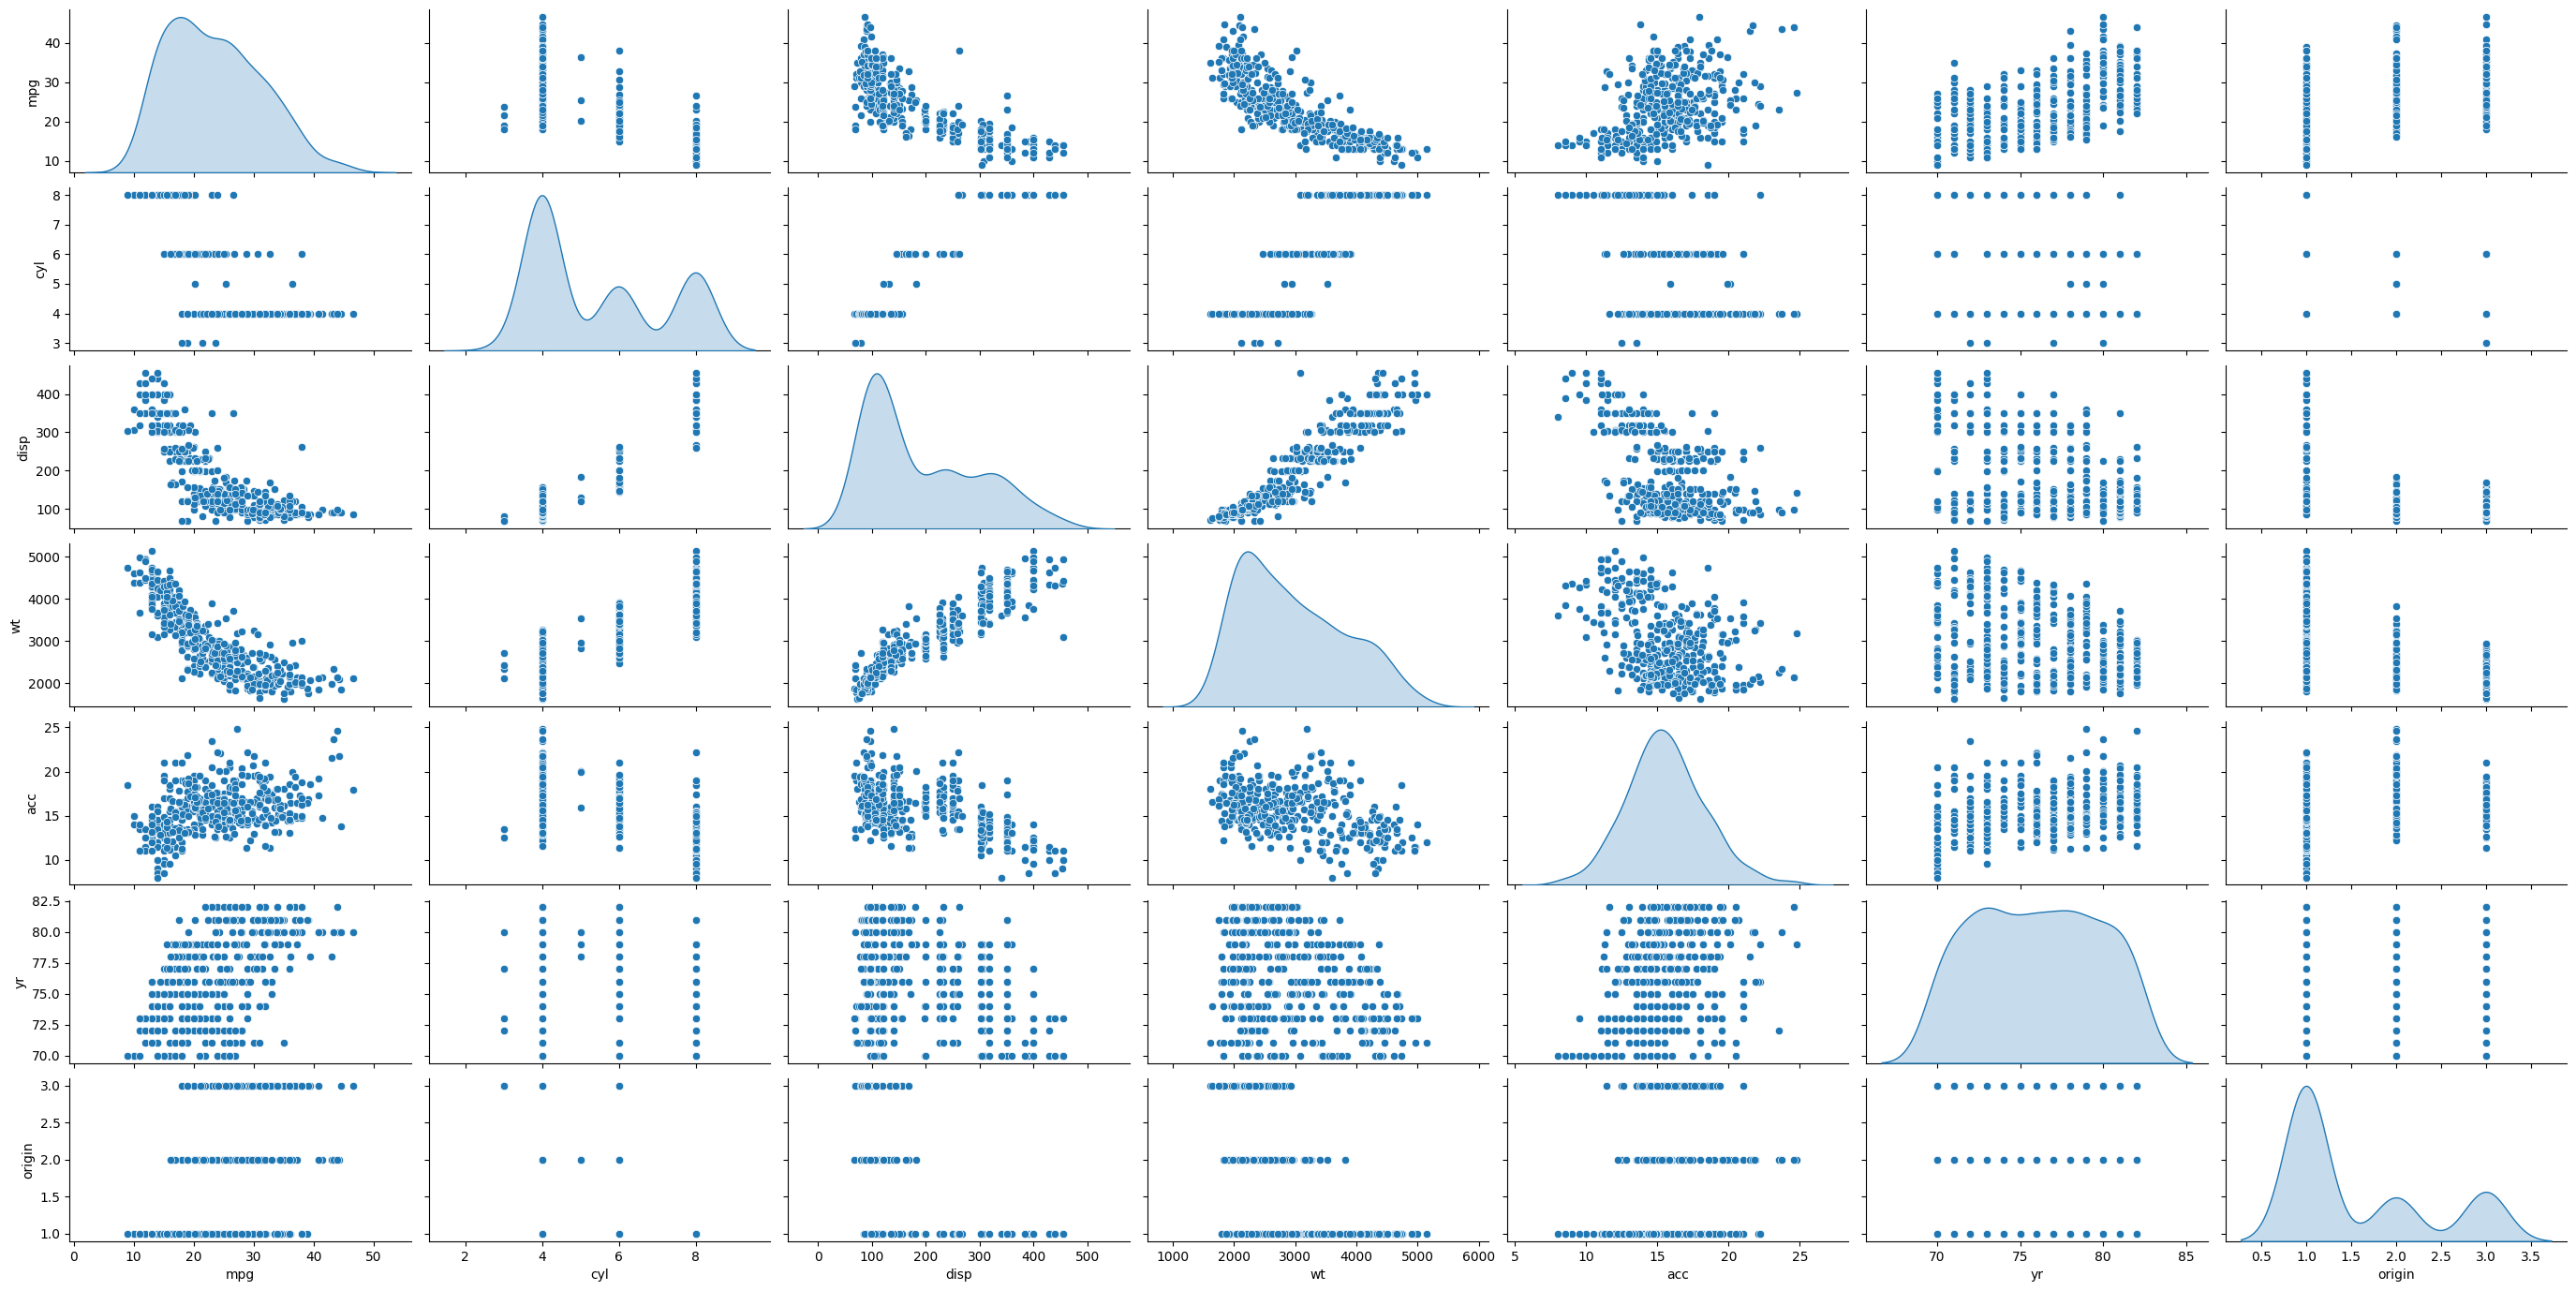

In [ ]:
sns.pairplot(car, height=2, aspect=2, diag_kind='kde')

**D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.**

<Axes: xlabel='wt', ylabel='disp'>

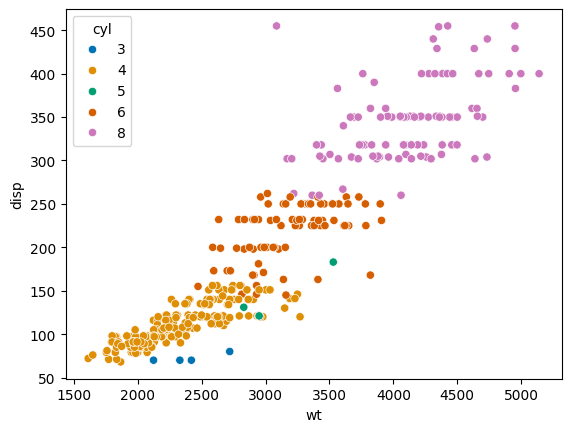

In [ ]:
sns.scatterplot(data=car, x='wt', y='disp', hue='cyl', palette='colorblind')

**E. Share insights for Q2.d.**

Insights: From the above plot, it looks that wt and disp has positive linear relationship with respective to the hue(cyl). Its seen that cyl(3, 4, 5) are more leaned towards the weight. Also cyl(8) looks to have heavier weight and engine displacement with significant outlier also present. all cyl has some datapoints overlapping.

**F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.**

<Axes: xlabel='wt', ylabel='mpg'>

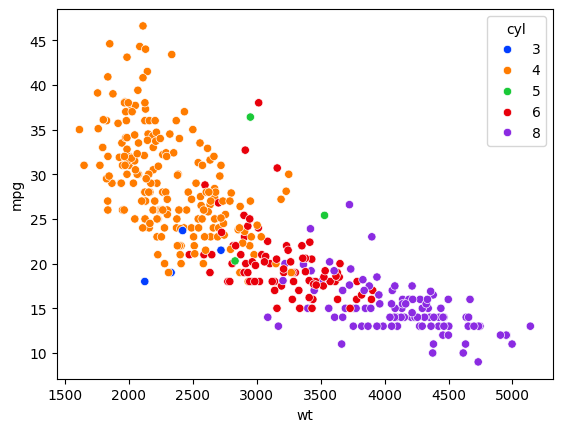

In [ ]:
sns.scatterplot(data=car, x='wt', y='mpg', hue='cyl', palette='bright')

**G. Share insights for Q2.f.**

Insights: From the above visual wt with mpg has negative linear relationship between each other with hue(cyl). cyl 4 and 8 has more data points to be more than other cyl. There could also be possible outliers as in the dataset.

**H. Check for unexpected values in all the features and datapoints with such values.**
[Hint: ‘?’ is present in ‘hp’]

In [ ]:
car['hp'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [ ]:
car=car.replace('?', np.NaN)

In [ ]:
car.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [ ]:
car_percentage=(car.isnull().sum()/len(car))*100
car_percentage

car_name    0.000000
mpg         0.000000
cyl         0.000000
disp        0.000000
hp          1.507538
wt          0.000000
acc         0.000000
yr          0.000000
origin      0.000000
dtype: float64

In [ ]:
car['hp']=car['hp'].fillna(car['hp'].median())


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    float64
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [ ]:
car.describe()

mpg         cyl        disp          hp           wt  \
count  398.000000  398.000000  398.000000  398.000000   398.000000   
mean    23.514573    5.454774  193.425879  104.304020  2970.424623   
std      7.815984    1.701004  104.269838   38.222625   846.841774   
min      9.000000    3.000000   68.000000   46.000000  1613.000000   
25%     17.500000    4.000000  104.250000   76.000000  2223.750000   
50%     23.000000    4.000000  148.500000   93.500000  2803.500000   
75%     29.000000    8.000000  262.000000  125.000000  3608.000000   
max     46.600000    8.000000  455.000000  230.000000  5140.000000   

              acc          yr      origin  
count  398.000000  398.000000  398.000000  
mean    15.568090   76.010050    1.572864  
std      2.757689    3.697627    0.802055  
min      8.000000   70.000000    1.000000  
25%     13.825000   73.000000    1.000000  
50%     15.500000   76.000000    1.000000  
75%     17.175000   79.000000    2.000000  
max     24.800000   82.000000    3.000000

Insight: After missing value treating the hp: horsepower seems to be ranging between 46 to 230 with the mean approximately 104.30. Also the mean seems higher than the median at 93.5 indicating postivity skewed distribution.

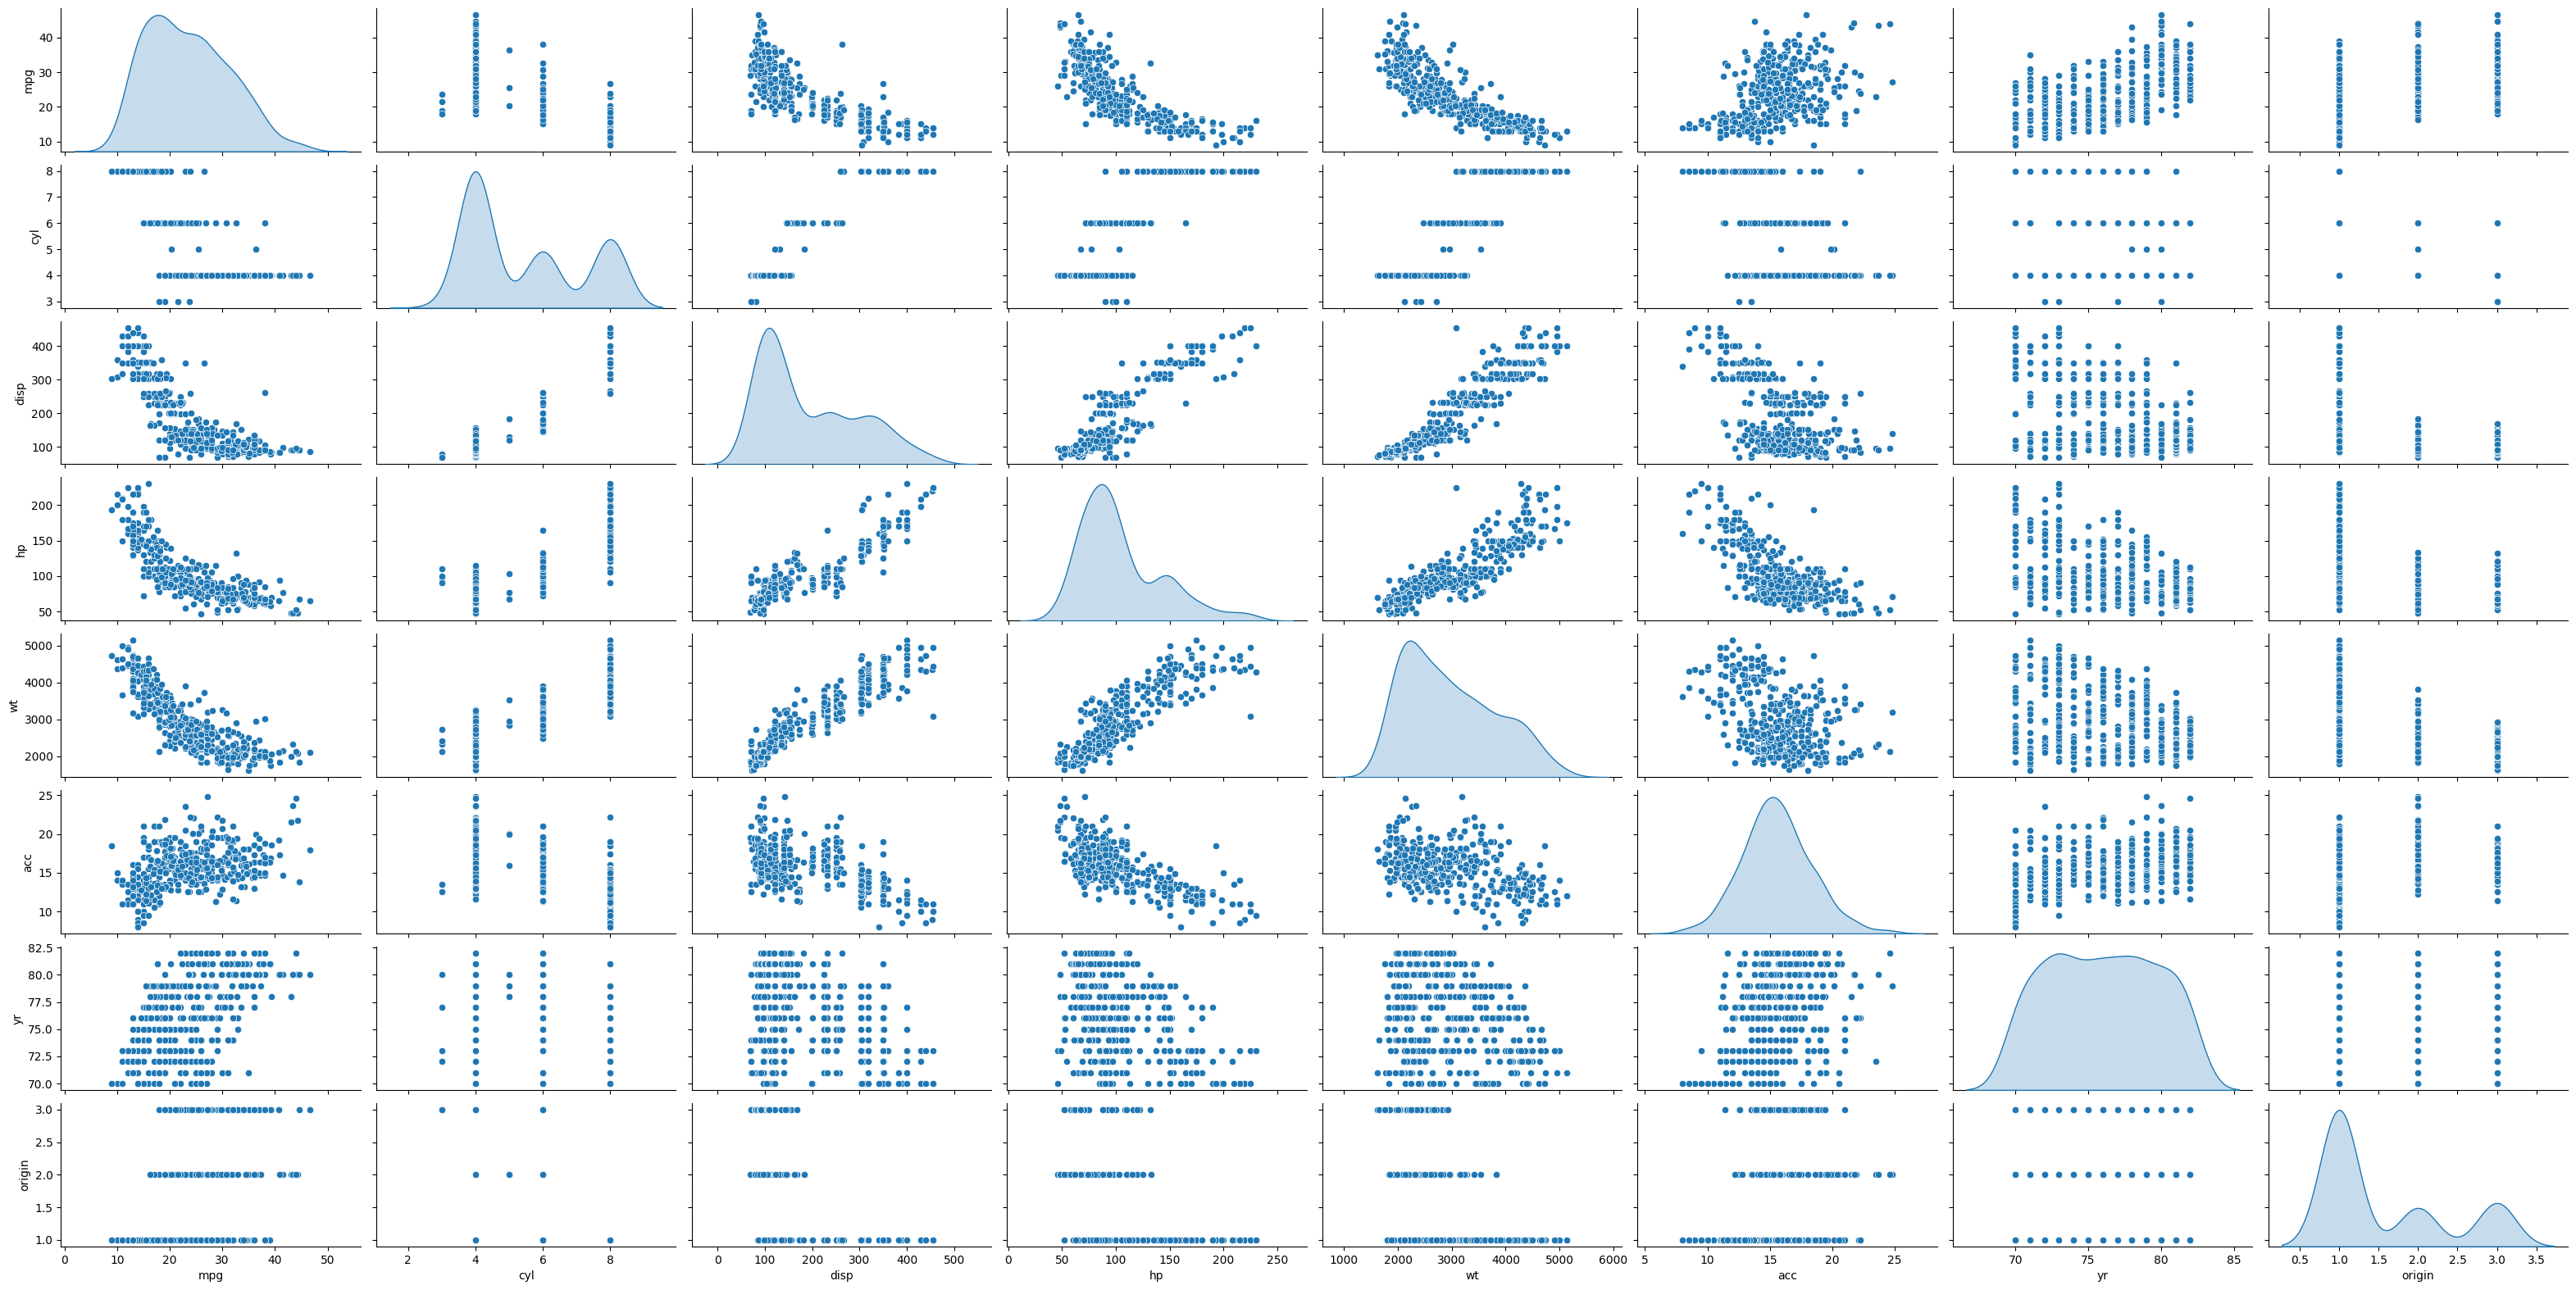

In [ ]:
sns.pairplot(car, height=2, aspect=2, diag_kind='kde')

**3. Clustering**

In [ ]:
#scaling the dataset

from scipy.stats import zscore
carscale=car.drop(columns=['car_name'])
car_sc=carscale.apply(zscore)

#or
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#car_sc=scaler.fit_transform(car)

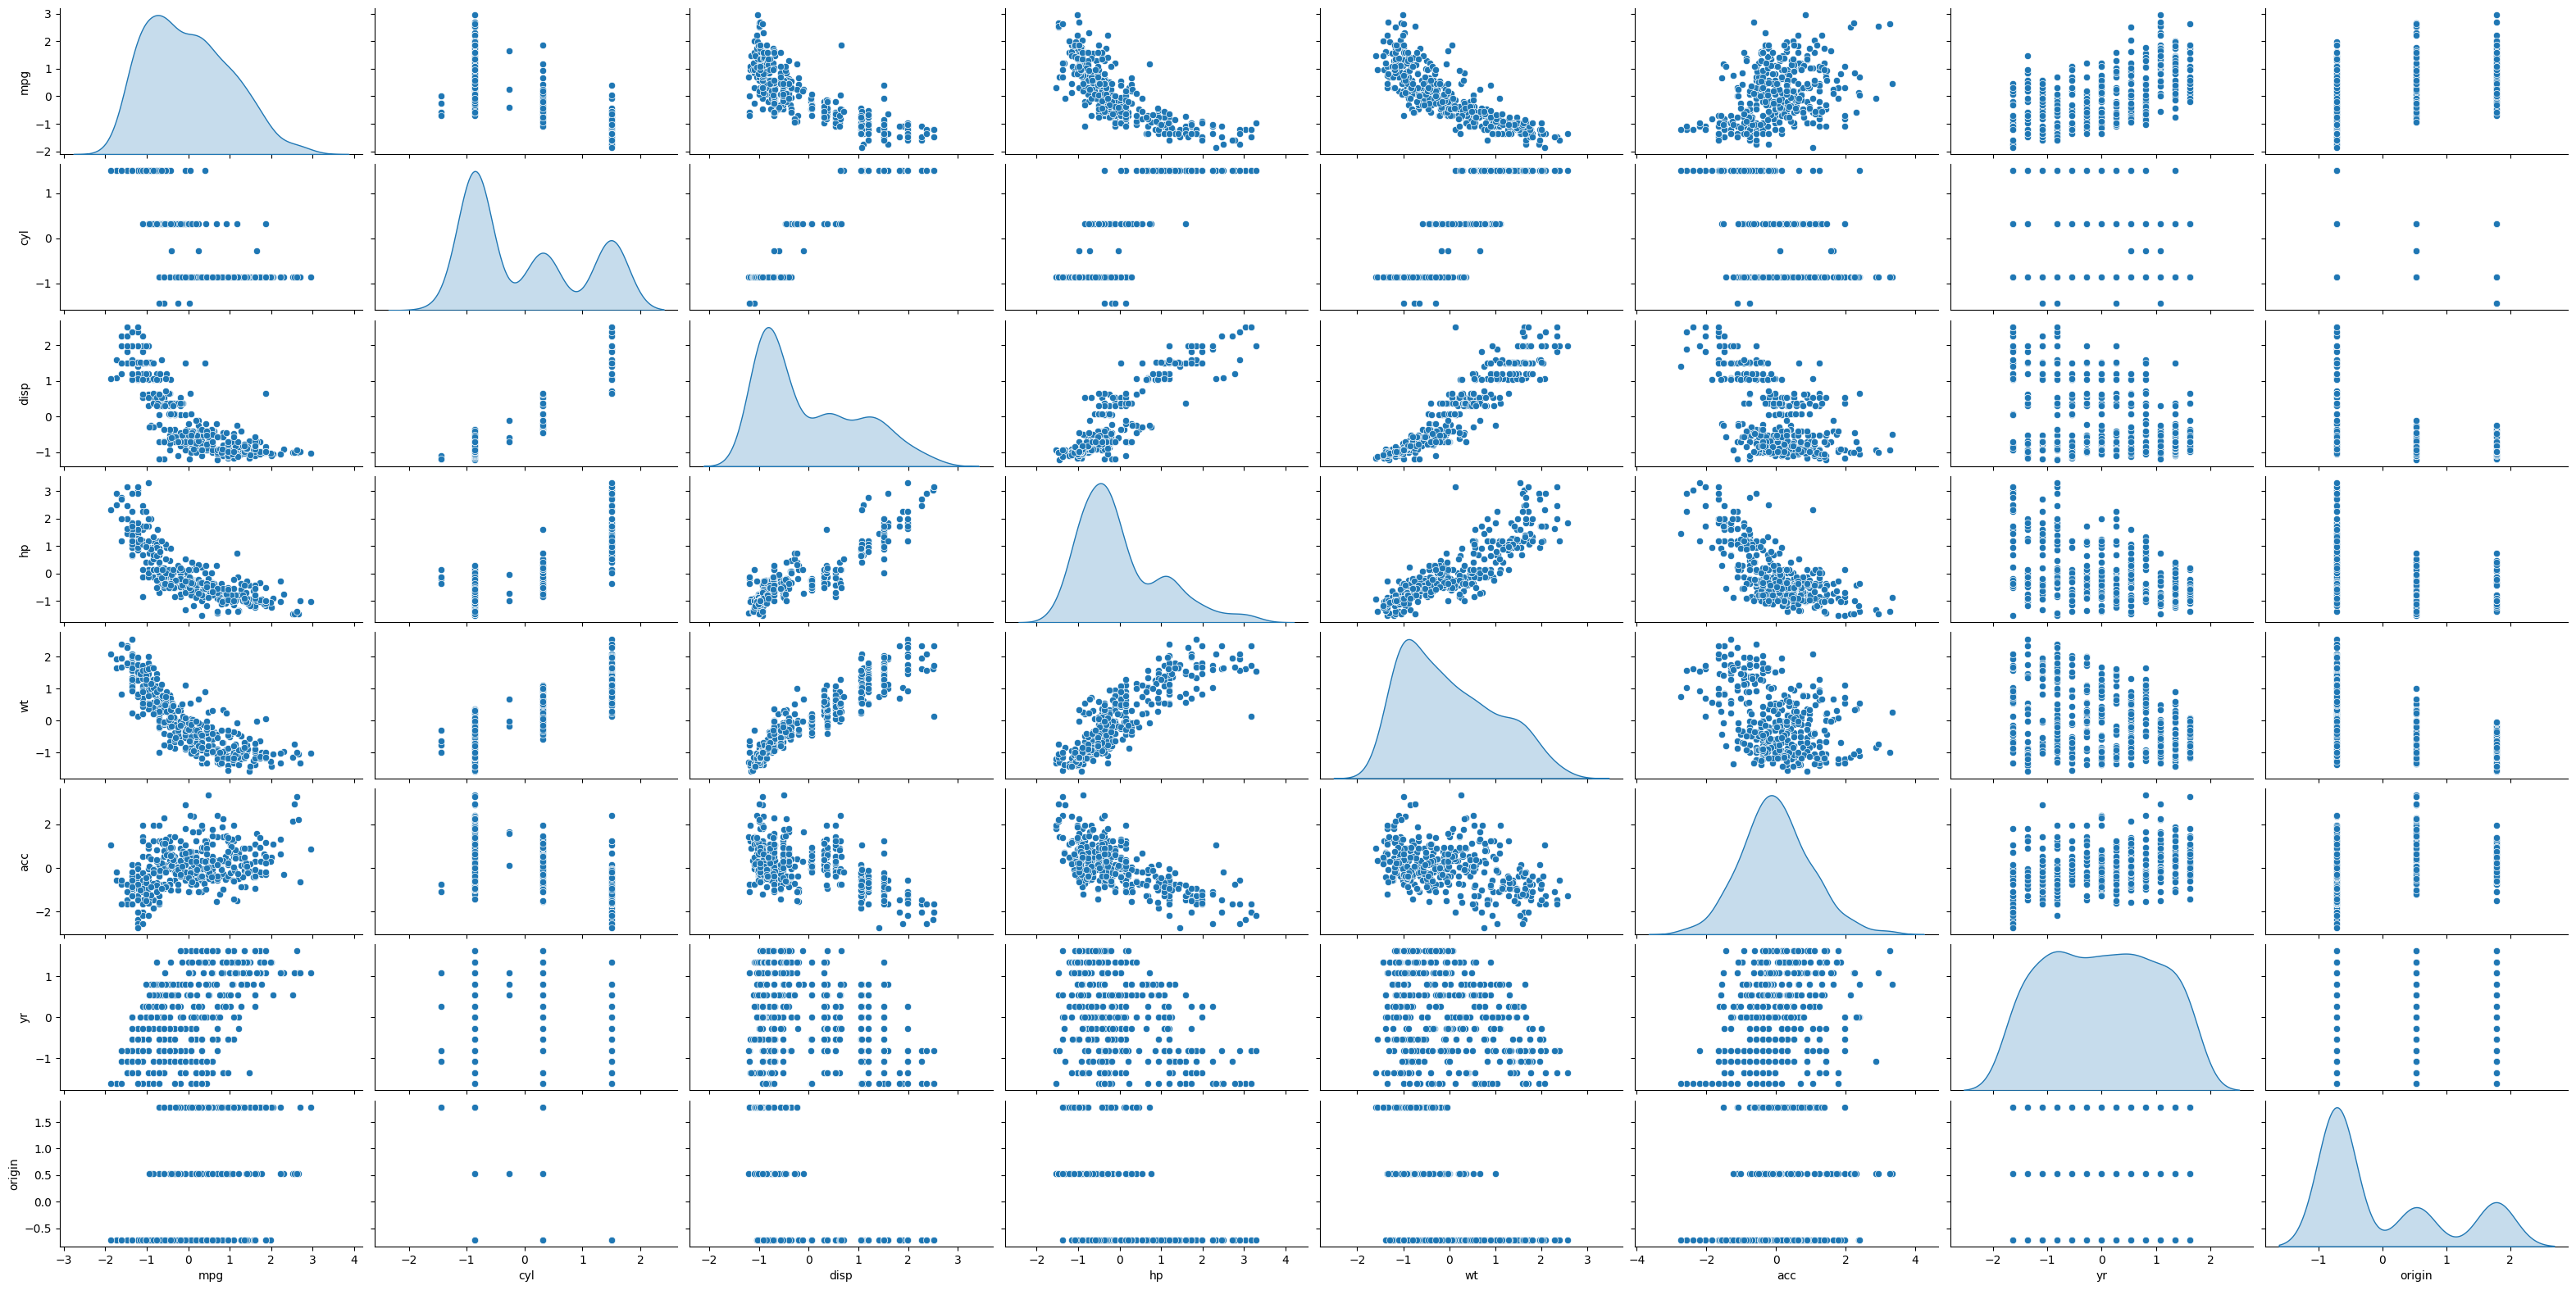

In [ ]:
sns.pairplot(car_sc, height=2, aspect=2, diag_kind='kde')

**A. Apply K-Means clustering for 2 to 10 clusters.**

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [ ]:
#using within sum of squared to identify the kmean clusters
wss=[]

for i in range(2,10):
    KM=KMeans(n_clusters=i, random_state=42)
    KM.fit(car_sc)
    wss.append(KM.inertia_)
wss

[1588.5924567918623,
 1190.0436525504847,
 988.0688340114523,
 829.7157874488787,
 750.8737927045281,
 681.6526858914019,
 633.4035136870295,
 596.7852585282913]

In [ ]:
#using average distortion method

clusters=range(2,10)
meandistortion=[]

for k in clusters:
   model=KMeans(n_clusters=k, random_state=42)
   model.fit(car_sc)
   prediction=model.predict(car_sc)
   meandistortion.append(sum(np.min(cdist(car_sc, model.cluster_centers_, 'euclidean'), axis=1))/ car_sc.shape[0])
meandistortion

[1.914461572779493,
 1.6309735124606939,
 1.4792774534785125,
 1.33629116304228,
 1.2794485798245185,
 1.2171404360851596,
 1.1825461106114614,
 1.1439047667244666]

**B. Plot a visual and find elbow point.**

In [ ]:
!pip install kneed

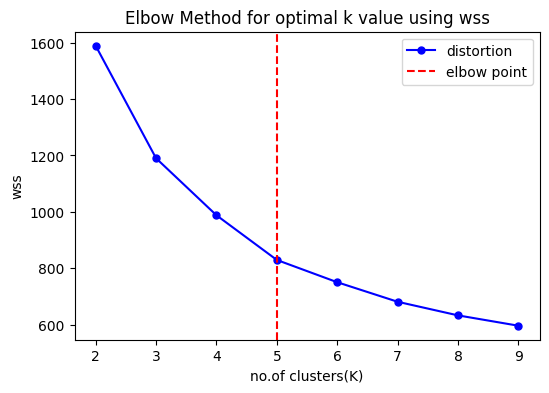

In [ ]:
from kneed import KneeLocator
#finding the elbow point using kneelocator
Automatic=KneeLocator(range(2,10), wss, curve='convex', direction='decreasing' )

plt.figure(figsize=(6,4))
plt.plot(range(2,10), wss, 'bo-', markersize=5, label='distortion')
plt.xlabel('no.of clusters(K)')
plt.ylabel('wss')
plt.title('Elbow Method for optimal k value using wss')
#Automatic highlighting of the elbow point using kneelocator
if Automatic.knee is not None:
  plt.axvline(x=Automatic.knee, color='r', linestyle='--', label='elbow point')
  plt.plot(Automatic.knee, wss[Automatic.knee-1], markersize=5)

plt.legend()
plt.show()

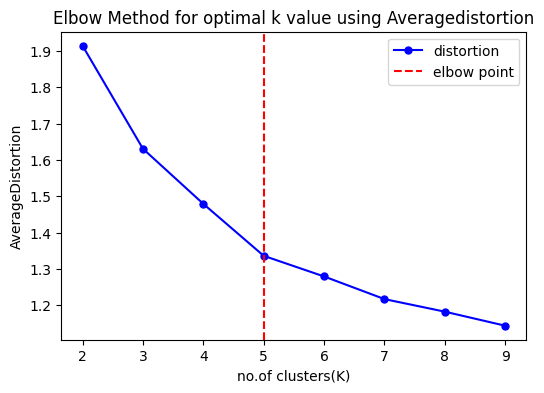

In [ ]:

#finding the elbow point using kneelocator
Automatic_knee=KneeLocator(clusters, meandistortion, curve='convex', direction='decreasing' )

plt.figure(figsize=(6,4))
plt.plot(clusters, meandistortion, 'bo-', markersize=5, label='distortion')
plt.xlabel('no.of clusters(K)')
plt.ylabel('AverageDistortion')
plt.title('Elbow Method for optimal k value using Averagedistortion')


#Automatic highlighting of the elbow point using kneelocator
if Automatic_knee.knee is not None:
  plt.axvline(x=Automatic_knee.knee, color='r', linestyle='--', label='elbow point')
  plt.plot(Automatic_knee.knee, meandistortion[Automatic_knee.knee-1], markersize=5)

plt.legend()
plt.show()

**C. On the above visual, highlight which are the possible Elbow points.**

Based on the visuals:

From **pairplot** the possible number of clusters seemed **3**.

From **wss method** we can see pronounced drop from K=2 to K=3, and at k=5 we can see noticeable drop. By using automatic kneelocator the cluster also is 5.

By average distortion method a similar pattern is seen as in like wss method at K=3 and K=5. By using automatic knee locator, the number of cluster is 5.

So, we can highlight the possible elbow as 5 on their respective wss and averagedistortion graph.


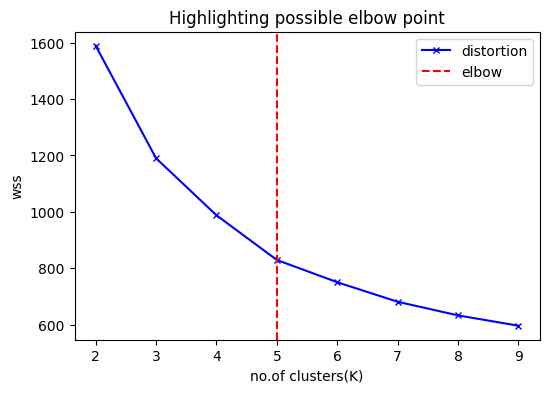

In [ ]:
elbow=5
plt.figure(figsize=(6,4))
plt.plot(range(2,10), wss, 'bx-', markersize=5, label='distortion')
plt.xlabel('no.of clusters(K)')
plt.ylabel('wss')
plt.title('Highlighting possible elbow point')
plt.axvline(x=elbow, color='red', linestyle='--', label='elbow')
plt.plot(elbow, wss[elbow-1], markersize=5)
plt.legend()
plt.show()

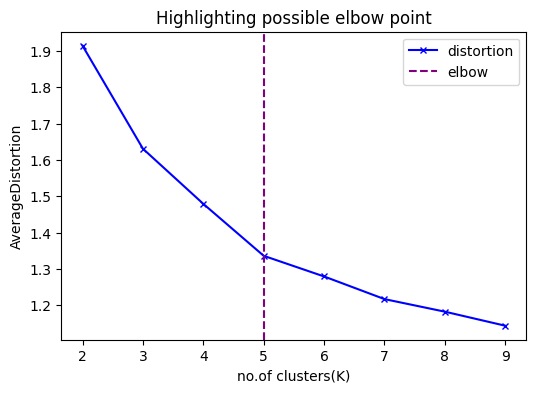

In [ ]:
elbow=5
plt.figure(figsize=(6,4))
plt.plot(clusters, meandistortion, 'bx-', markersize=5, label='distortion')
plt.xlabel('no.of clusters(K)')
plt.ylabel('AverageDistortion')
plt.title('Highlighting possible elbow point')
plt.axvline(x=elbow, color='purple', linestyle='--', label='elbow')
plt.plot(elbow, meandistortion[elbow-1], markersize=5)
plt.legend()
plt.show()

Insights:

**D. Train a K-means clustering model once again on the optimal number of clusters.**

1. k=5 are highlighted as possible k values from graph by both wss and average distortion method.

2. Also, since the pairplot indicates the possibility of 3 clusters, we can train for 3 and 5 clusters and check for the silhouette score to decide on the best no of clusters. Higher the score better the cluster defined.

In [ ]:
final_model=KMeans(n_clusters=3, random_state=42)
cluster_label3=final_model.fit_predict(car_sc)


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(car_sc, cluster_label3)

0.3246673901601845

In [ ]:
final_model=KMeans(n_clusters=5,  random_state=42)
cluster_label5=final_model.fit_predict(car_sc)

In [ ]:
silhouette_score(car_sc, cluster_label5)

0.33296973781495653

Insights: The silhouette score at k=5 is higher indicating the at k=5 the model performs better.So we can add new feature based on k=5 cluster value.

**E. Add a new feature in the DataFrame which will have labels based upon cluster value**

In [ ]:
car['cluster_value5']=cluster_label5
car.head()

car_name   mpg  cyl   disp     hp    wt   acc  yr  origin  \
0  chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70       1   
1          buick skylark 320  15.0    8  350.0  165.0  3693  11.5  70       1   
2         plymouth satellite  18.0    8  318.0  150.0  3436  11.0  70       1   
3              amc rebel sst  16.0    8  304.0  150.0  3433  12.0  70       1   
4                ford torino  17.0    8  302.0  140.0  3449  10.5  70       1   

   cluster_value5  
0               4  
1               4  
2               4  
3               4  
4               4

In [ ]:
car.sample(10)

car_name   mpg  cyl   disp     hp    wt   acc  yr  \
99                  amc hornet  18.0    6  232.0  100.0  2945  16.0  73   
140           amc matador (sw)  14.0    8  304.0  150.0  4257  15.5  74   
307  oldsmobile omega brougham  26.8    6  173.0  115.0  2700  12.9  79   
344             plymouth champ  39.0    4   86.0   64.0  1875  16.4  81   
245                ford fiesta  36.1    4   98.0   66.0  1800  14.4  78   
264                ford futura  18.1    8  302.0  139.0  3205  11.2  78   
317                  audi 4000  34.3    4   97.0   78.0  2188  15.8  80   
286            ford ltd landau  17.6    8  302.0  129.0  3725  13.4  79   
161  chevroelt chevelle malibu  16.0    6  250.0  105.0  3897  18.5  75   
64           plymouth fury iii  15.0    8  318.0  150.0  4135  13.5  72   

     origin  cluster_value5  
99        1               0  
140       1               4  
307       1               2  
344       1               2  
245       1               2  
264       1               4  
317       2               1  
286       1               4  
161       1               0  
64        1               4

In [ ]:
car['cluster_value5'].value_counts()

cluster_value5
4    94
3    84
0    81
1    72
2    67
Name: count, dtype: int64

**F. Plot a visual and color the datapoints based upon clusters.**

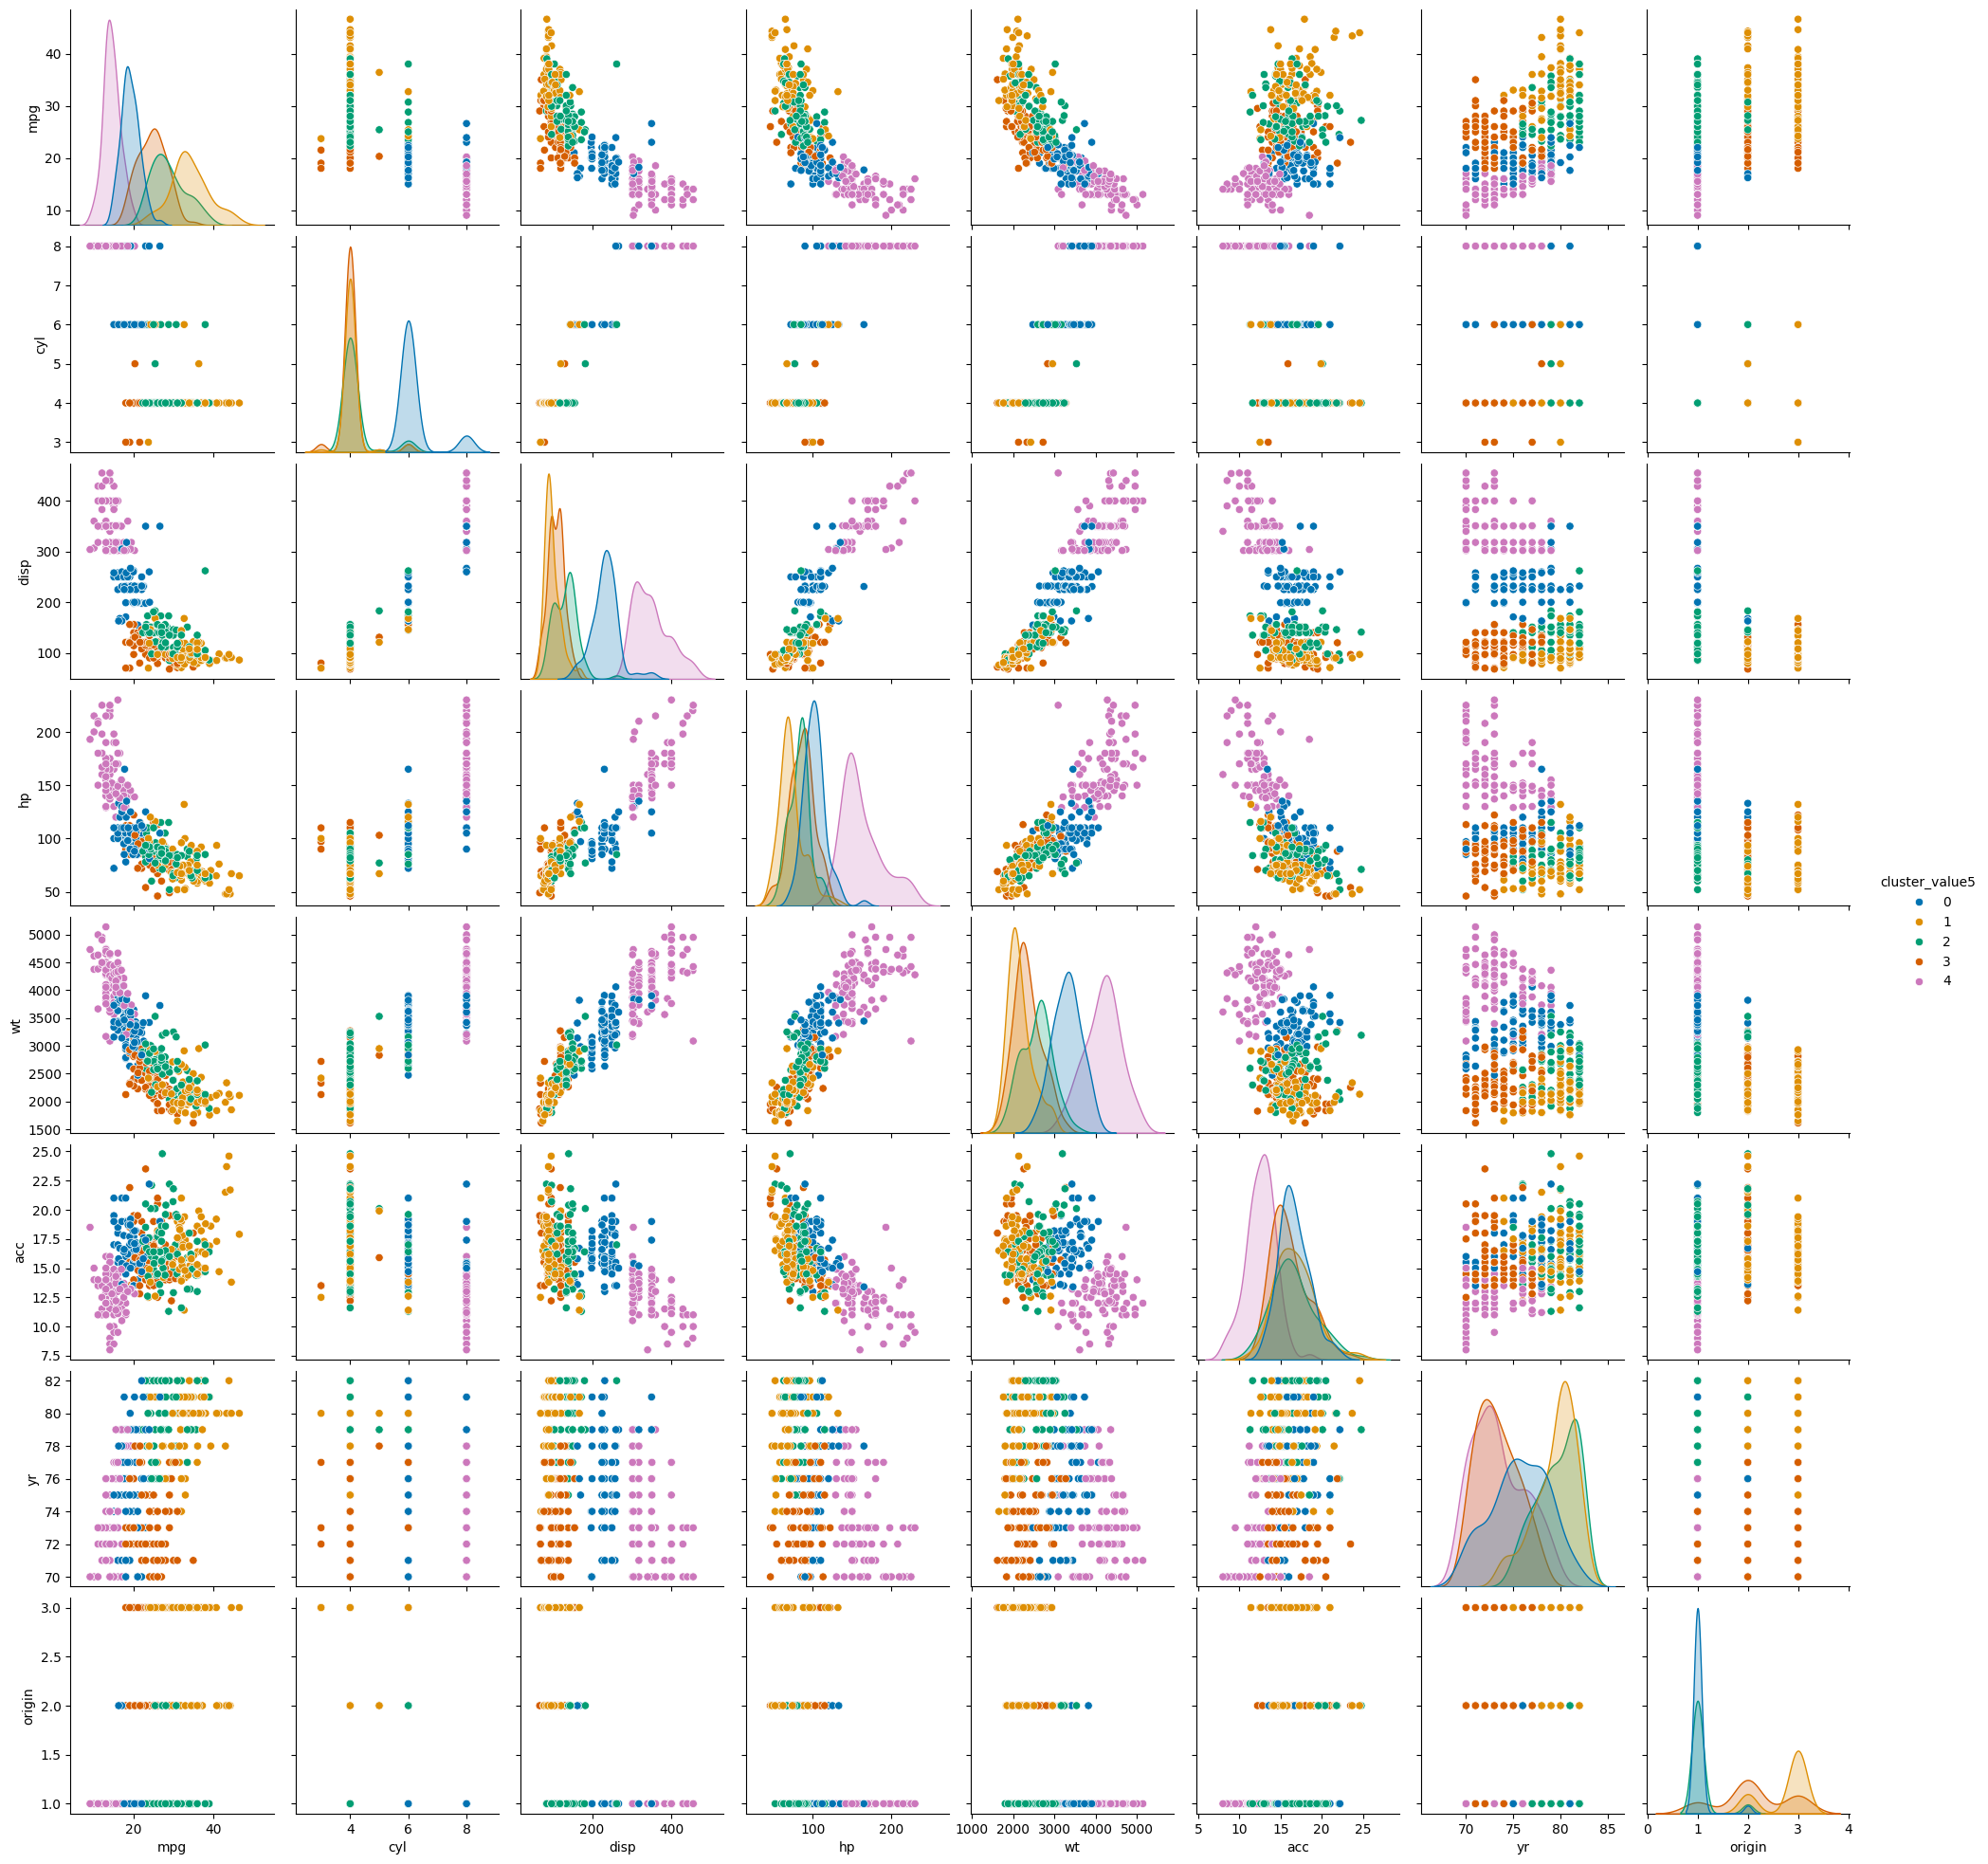

In [ ]:
sns.pairplot(data=car, hue='cluster_value5', palette='colorblind')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
reduced_data=pca.fit_transform(car_sc)


centroids=final_model.cluster_centers_
centroid_PCA=pca.transform(centroids)

pca_data=pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
pca_data['cluster']=cluster_label5

pca_data.sample(5)

PCA1      PCA2  cluster
78  -0.985322  0.567858        3
177 -0.897014  0.797560        3
33   1.036421  0.977430        0
173 -1.517424  1.155358        3
47   1.224295  0.483982        0

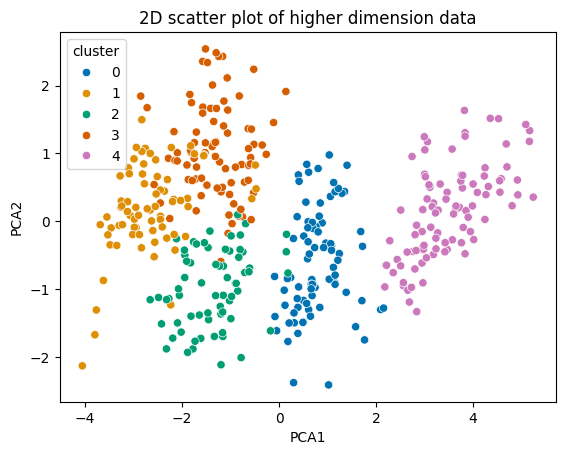

In [ ]:
sns.scatterplot(data=pca_data, x='PCA1', y='PCA2', hue='cluster', palette='colorblind')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('2D scatter plot of higher dimension data')
plt.show()

**G. Pass a new DataPoint and predict which cluster it belongs to.**

In [ ]:
final_model=KMeans(n_clusters=5,  random_state=42)
car_drop=car.drop(columns=['car_name'])
final_model.fit(car_drop)
prediction=final_model.predict(car_drop)

car['GROUP']=prediction
car_sc['GROUP']=prediction
print('Groups Assigned: \n')
car.head()


Groups Assigned: 



car_name   mpg  cyl   disp     hp    wt   acc  yr  origin  \
0  chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70       1   
1          buick skylark 320  15.0    8  350.0  165.0  3693  11.5  70       1   
2         plymouth satellite  18.0    8  318.0  150.0  3436  11.0  70       1   
3              amc rebel sst  16.0    8  304.0  150.0  3433  12.0  70       1   
4                ford torino  17.0    8  302.0  140.0  3449  10.5  70       1   

   cluster_value5  GROUP  
0               4      3  
1               4      1  
2               4      3  
3               4      3  
4               4      3

In [ ]:
car.sample(5)

car_name   mpg  cyl   disp     hp    wt   acc  \
387  oldsmobile cutlass ciera (diesel)  38.0    6  262.0   85.0  3015  17.0   
212                   cadillac seville  16.5    8  350.0  180.0  4380  12.1   
136                   ford gran torino  16.0    8  302.0  140.0  4141  14.0   
277                      peugeot 604sl  16.2    6  163.0  133.0  3410  15.8   
264                        ford futura  18.1    8  302.0  139.0  3205  11.2   

     yr  origin  cluster_value5  GROUP  
387  82       1               2      2  
212  76       1               4      4  
136  74       1               4      1  
277  78       2               0      3  
264  78       1               4      3

# **Part-2**

DOMAIN: Automobile
• CONTEXT: The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The
vehicle may be viewed from one of many different angles.
• DATA DESCRIPTION: The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were
used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles
was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to
distinguish between the cars.
• All the features are numeric i.e. geometric features extracted from the silhouette.
• PROJECT OBJECTIVE: Apply dimensionality reduction technique – PCA and train a model and compare relative results.

1. Data Understanding & Cleaning

**Read ‘vehicle.csv’ and save as DataFrame.**

In [ ]:
vehicle=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/USL/vehicle.csv')

In [ ]:
vehicle.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [ ]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

**Check percentage of missing values and impute with correct approach.**

In [ ]:
vehicle.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [ ]:
vehicle_percentage=(vehicle.isnull().sum()/len(vehicle))*100
vehicle_percentage

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

In [ ]:
for cols in vehicle.columns:
  if (cols!='class'):
     vehicle[cols]=vehicle[cols].fillna(vehicle[cols].median())

In [ ]:
#checkig again for missing values after imputing
vehicle.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

**Visualize a Pie-chart and print percentage of values for variable ‘class’.**

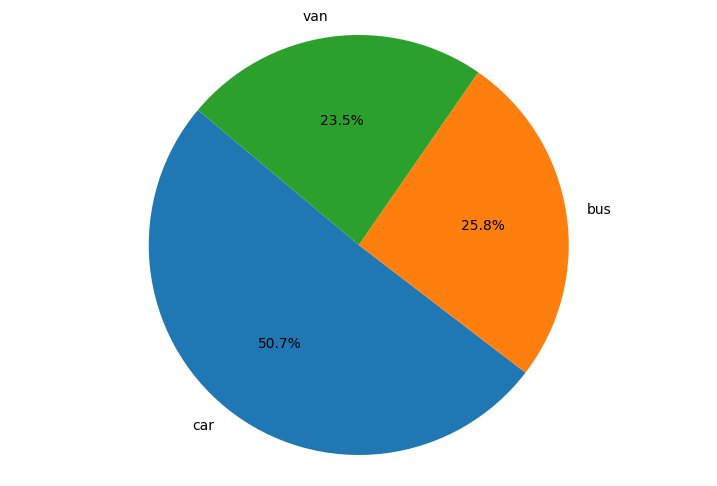

In [ ]:
class_counts=vehicle['class'].value_counts()
plt.figure(figsize=(9,6))
plt.pie(class_counts, autopct='%1.1f%%', startangle=140, labels=class_counts.index)
plt.axis('equal')
plt.show()

**D. Check for duplicate rows in the data and impute with correct approach.**

In [ ]:
vehicle.duplicated().sum()

0

**2. Data Preparation:**

**A. Split data into X and Y. [Train and Test optional]**

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X=vehicle.loc[:, vehicle.columns!='class'] #feature
y=vehicle['class'].astype('category').cat.codes #target (.cat.codes converts class object to first category then assigns numerical variables to class column)


print(X)
print(y)

     compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                       10          162.0   
1                    57.0        

**B. Standardize the Data.**

In [ ]:
Xscaled=X.apply(zscore)
Xscaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
4         1.671982          -0.648070                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
4                     7.309005        0.538390         -0.179311   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

## **3. Model Building:**

**A. Train a base Classification model using SVM.**

In [ ]:
x=vehicle.iloc[:, 0:18]
y=vehicle['class']

In [ ]:
Xscaled=x.apply(zscore)
Xscaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
4         1.671982          -0.648070                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
4                     7.309005        0.538390         -0.179311   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(Xscaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
svm_vehicle=SVC(kernel='rbf', random_state=42)
svm_vehicle.fit(X_train, y_train)
y_pred_svm_train=svm_vehicle.predict(X_train)
y_pred_svm_test=svm_vehicle.predict(X_test)


**B.Print Classification metrics for train data.**

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
accuracy=svm_vehicle.score(X_test, y_test)
accuracy

0.9647058823529412

In [ ]:
print('Accuracy on train data:', '\n\n', accuracy_score(y_train, y_pred_svm_train), '\n\n')
print('Accuracy on test data:', '\n\n', accuracy_score(y_test, y_pred_svm_test))

Accuracy on train data: 

 0.9792899408284024 


Accuracy on test data: 

 0.9647058823529412


In [ ]:
print('classification report_train:', '\n\n', classification_report(y_train, y_pred_svm_train ))


classification report_train: 

               precision    recall  f1-score   support

         bus       0.98      0.98      0.98       166
         car       1.00      0.98      0.99       351
         van       0.94      0.99      0.96       159

    accuracy                           0.98       676
   macro avg       0.97      0.98      0.98       676
weighted avg       0.98      0.98      0.98       676



In [ ]:
print(confusion_matrix(y_train, y_pred_svm_train))

[[162   0   4]
 [  2 343   6]
 [  1   1 157]]


**C. Apply PCA on the data with 10 components.**

In [ ]:
#Before applying PCA on data, Covariance matrix, get eigen values and vectors.
cov_matrix=np.cov(Xscaled, rowvar=False)
print(cov_matrix)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.10385472 -0.18325156  0.07969

In [ ]:
eigen_values, eigen_vectors=np.linalg.eig(cov_matrix)
print('eigen_values:', eigen_values, '\n\n')
print('eigen_vectors:',eigen_vectors)

eigen_values: [9.40460261e+00 3.01492206e+00 1.90352502e+00 1.17993747e+00
 9.17260633e-01 5.39992629e-01 3.58870118e-01 2.21932456e-01
 1.60608597e-01 9.18572234e-02 6.64994118e-02 4.66005994e-02
 3.57947189e-02 2.96445743e-03 1.00257898e-02 2.74120657e-02
 1.79166314e-02 2.05792871e-02] 


eigen_vectors: [[ 2.75283688e-01  1.26953763e-01 -1.19922479e-01  7.83843562e-02
   6.95178336e-02 -1.44875476e-01 -4.51862331e-01 -5.66136785e-01
  -4.84418105e-01 -2.60076393e-01  4.65342885e-02 -1.20344026e-02
  -1.56136836e-01 -1.00728764e-02 -6.00532537e-03  6.00485194e-02
  -6.50956666e-02 -9.67780251e-03]
 [ 2.93258469e-01 -1.25576727e-01 -2.48205467e-02  1.87337408e-01
  -8.50649539e-02  3.02731148e-01  2.49103387e-01 -1.79851809e-01
  -1.41569001e-02  9.80779086e-02  3.01323693e-03  2.13635088e-01
  -1.50116709e-02 -9.15939674e-03  7.38059396e-02 -4.26993118e-01
  -2.61244802e-01 -5.97862837e-01]
 [ 3.04609128e-01  7.29516436e-02 -5.60143254e-02 -7.12008427e-02
   4.06645651e-02  1.3840577

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=10)
pca.fit(Xscaled)

PCA(n_components=10)

In [ ]:
#getting the eigen_values variance to see how much the data is being captured.
pca.explained_variance_


array([9.40460261, 3.01492206, 1.90352502, 1.17993747, 0.91726063,
       0.53999263, 0.35887012, 0.22193246, 0.1606086 , 0.09185722])

In [ ]:
pd.DataFrame(pca.components_).T #helps to interpret how much of the original feature is transformed into principal components

#or
#(pca.components_).T

0         1         2         3         4         5         6  \
0   0.275284 -0.126954 -0.119922  0.078384  0.069518  0.144875  0.451862   
1   0.293258  0.125577 -0.024821  0.187337 -0.085065 -0.302731 -0.249103   
2   0.304609 -0.072952 -0.056014 -0.071201  0.040665 -0.138406  0.074035   
3   0.267607 -0.189634  0.275074 -0.042605 -0.046147  0.248137 -0.176913   
4   0.080504 -0.122175  0.642013  0.032726 -0.040549  0.236933 -0.397877   
5   0.097276  0.010748  0.591801  0.031415  0.213433 -0.419331  0.503414   
6   0.317093  0.048118 -0.097628 -0.095749 -0.015485  0.116100  0.064988   
7  -0.314133  0.012750  0.057648  0.082290  0.076852 -0.141840  0.013811   
8   0.313959  0.059935 -0.109512 -0.092458  0.002176  0.098056  0.096657   
9   0.282831  0.116221 -0.017064  0.188006 -0.060637 -0.461675 -0.104552   
10  0.309280  0.062281  0.056324 -0.119844 -0.000456  0.236225  0.114623   
11  0.313788  0.053784 -0.108841 -0.091745 -0.019555  0.157820  0.083735   
12  0.272047  0.209233 -0.031464  0.200095 -0.061599 -0.135576 -0.373944   
13 -0.020814  0.488525  0.286277 -0.065505  0.145530  0.241357  0.111953   
14  0.041456 -0.055090 -0.115679  0.604794  0.729190  0.203209 -0.080633   
15  0.058225 -0.124085 -0.075283 -0.666114  0.599196 -0.191961 -0.284559   
16  0.030280 -0.540915  0.008736  0.105526 -0.100602  0.156939  0.018145   
17  0.074145 -0.540354  0.039524  0.047489 -0.029861 -0.241223  0.015724   

           7         8         9  
0  -0.566137 -0.484418 -0.260076  
1  -0.179852 -0.014157  0.098078  
2   0.434749 -0.167572 -0.205032  
3   0.101998 -0.230314 -0.047789  
4  -0.068715 -0.277128  0.108075  
5   0.161153  0.148032 -0.118266  
6   0.100688  0.054457  0.165167  
7  -0.215497 -0.156867 -0.151612  
8   0.063593  0.005250  0.193778  
9  -0.249496 -0.061036  0.469060  
10  0.050210  0.297588 -0.129986  
11  0.043765  0.083367  0.158204  
12 -0.108474  0.241655 -0.686494  
13 -0.340878  0.320222  0.127648  
14  0.156488  0.022105  0.098364  
15 -0.208774  0.010176 -0.035515  
16 -0.304580  0.517223  0.019396  
17 -0.030419  0.171506  0.064131

**D. Visualize Cumulative Variance Explained with Number of Components.**

In [ ]:
#To visualize we have to obtain the Cumulative Variance explained
tot=sum(eigen_values)
var_exp=[(i/tot)*100 for i in sorted(eigen_values, reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print(cum_var_exp)

[ 52.18603365  68.9158021   79.47844095  86.02590063  91.11576952
  94.11218252  96.10354875  97.33504945  98.22626473  98.73597943
  99.10498391  99.36357011  99.5621946   99.71430385  99.82849808
  99.92791726  99.98355026 100.        ]


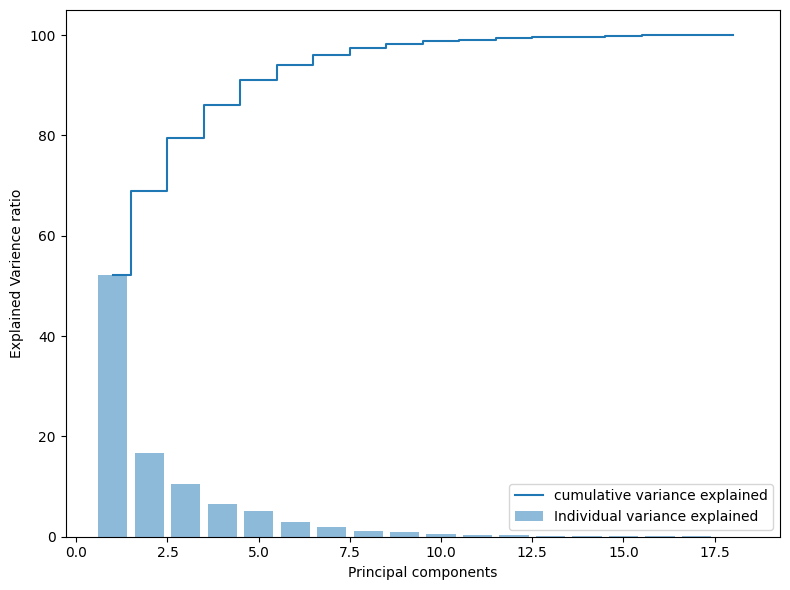

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(range(1, eigen_values.size+1), var_exp, alpha=0.5, align='center', label='Individual variance explained')
plt.step(range(1, eigen_values.size+1), cum_var_exp, where='mid', label='cumulative variance explained')
plt.xlabel('Principal components')
plt.ylabel('Explained Varience ratio')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

**E. Draw a horizontal line on the above plot to highlight the threshold of 90%.**

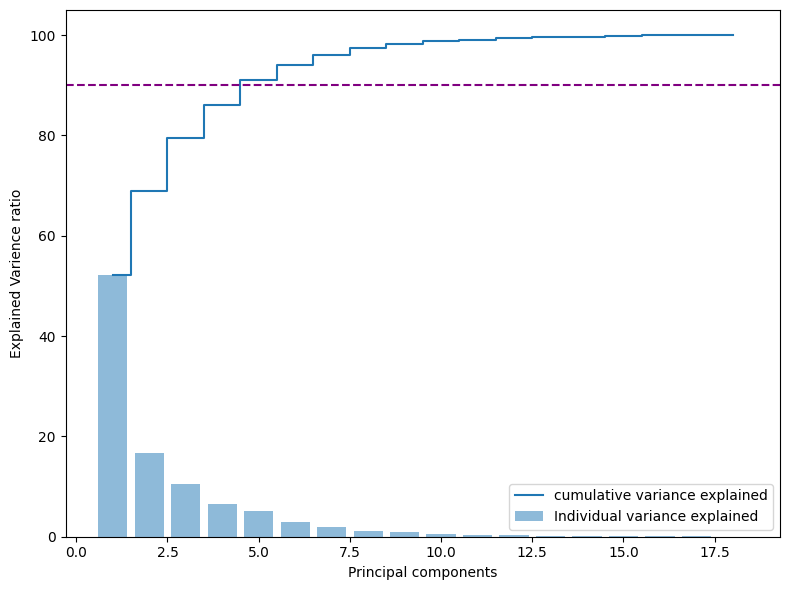

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(range(1, eigen_values.size+1), var_exp, alpha=0.5, align='center', label='Individual variance explained')
plt.step(range(1, eigen_values.size+1), cum_var_exp, where='mid', label='cumulative variance explained')
plt.xlabel('Principal components')
plt.ylabel('Explained Varience ratio')
plt.axhline(y=90, color='purple', linestyle='--')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

**F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained**

In [ ]:
cum_var_ratio=np.cumsum(pca.explained_variance_ratio_)
n_components=np.argmax(cum_var_ratio>=0.90)+1 # this gives the n_components based on the above condition with 90% minimum

pca_1=PCA(n_components=n_components)


In [ ]:
#with pca_1 obtained applying pca on the Xscaled data >=90%
pca_1.fit(Xscaled)

PCA(n_components=5)

In [ ]:
print(pca_1.explained_variance_ratio_)

[0.52186034 0.16729768 0.10562639 0.0654746  0.05089869]


In [ ]:
xpca_1=pca_1.transform(Xscaled)

**G. Train SVM model on components selected from above step.**

In [ ]:
x_train_1, x_test_1, y_train_1, y_test_1=train_test_split(xpca_1, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.svm import SVC
svm_vehicle1=SVC(kernel='rbf', random_state=42)
svm_vehicle1.fit(x_train_1, y_train_1)
y_pred_svm_train1=svm_vehicle1.predict(x_train_1)
y_pred_svm_test1=svm_vehicle1.predict(x_test_1)

In [ ]:
print('Accuracy on train data:', '\n\n', accuracy_score(y_train_1, y_pred_svm_train1), '\n\n')
print('Accuracy on test data:', '\n\n', accuracy_score(y_test_1, y_pred_svm_test1))

Accuracy on train data: 

 0.8121301775147929 


Accuracy on test data: 

 0.7176470588235294


**H. Print Classification metrics for train data of above model and share insights.**

In [ ]:
print('classification report_train_pca:', '\n\n', classification_report(y_train_1, y_pred_svm_train1 ))

classification report_train_pca: 

               precision    recall  f1-score   support

         bus       0.85      0.70      0.77       166
         car       0.85      0.89      0.87       351
         van       0.70      0.76      0.73       159

    accuracy                           0.81       676
   macro avg       0.80      0.78      0.79       676
weighted avg       0.82      0.81      0.81       676



Insights: Based on the above metrics on the train data, the accuracy using 10 PCA components is 81%. It looks the cars have the highest precision and recall rate at 85% and 89% each, it correctly identifies the cars and has fewer false negative and false positive.The least rate is seen for van at 70% and 76%, this indicates the highest false positive. The F1-score for car is 87%, followed by bus and least is van. All these are clearly seen in confusion matrix as well.

In [ ]:
print(confusion_matrix(y_train_1, y_pred_svm_train1))

[[117  29  20]
 [  8 311  32]
 [ 13  25 121]]


In [ ]:
print('classification report_test_pca:', '\n\n', classification_report(y_test_1, y_pred_svm_test1 ))

classification report_test_pca: 

               precision    recall  f1-score   support

         bus       0.78      0.62      0.69        52
         car       0.79      0.82      0.81        78
         van       0.54      0.65      0.59        40

    accuracy                           0.72       170
   macro avg       0.70      0.70      0.69       170
weighted avg       0.73      0.72      0.72       170



The metrics on test data is less in accuracy than the train data at 72%, this indicates some overfitting of the datapoints.

In [ ]:
print(confusion_matrix(y_test_1, y_pred_svm_test1))

[[32 10 10]
 [ 2 64 12]
 [ 7  7 26]]


**4. Performance Improvement:**

**A. Train another SVM on the components out of PCA. Tune the parameters to improve performance.**

**B. Share best Parameters observed from above step.**

Instead of training on different svm kernel, we can hypertune, gridsearch and obtain the best parameters and then use that with the components out of PCA.

In [ ]:
#Tuning the parameters for svm to obtain the best hyperparameters
from sklearn.model_selection import cross_val_score

#lets define parameters for support vector machine
parameters={'C':[1,10],
            'kernel':['linear','rbf','poly'],
            'gamma':['scale','auto']
            } #C is used regularizing parameters, kernel for different function, gamma is range of kernel coeffecients

best_accuracy=0
best_parameters={}

# Iterate the parameters
for C in parameters['C']:
    for kernel in parameters['kernel']:
        for gamma in parameters['gamma']:
# training the model using the parameters
            svm_vehicle1_t=SVC(C=C, kernel=kernel, gamma=gamma, random_state=42)
            svm_vehicle1_t.fit(x_train_1, y_train_1)
            y_pred_svm_train1_t=svm_vehicle1_t.predict(x_train_1)
            y_pred_svm_test1_t=svm_vehicle1_t.predict(x_test_1)
# cross-validating the scores to obtain the best parameters
            scores_svm=cross_val_score(svm_vehicle1_t, x_train_1, y_train_1, cv=5)
            avg_accuracy=np.mean(scores_svm)

# if statement to obtain best hyperparmeters and print them
            if avg_accuracy>best_accuracy:
              best_accuracy= avg_accuracy
              best_parameters={'C': C, 'kernel': kernel, 'gamma': gamma}

In [ ]:
#Using hyperparmeter tuning
best_parameters

{'C': 10, 'kernel': 'rbf', 'gamma': 'auto'}

In [ ]:
#Obtaining best parameter using gridsearch
from sklearn.model_selection import GridSearchCV
svm_model=SVC()

param_grid={'C':[0.1, 1, 10, 100],
            'kernel':['rbf', 'linear'],
            'gamma':[1, 0.1, 0.01, 0.001]}
grid_search=GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(x_train_1, y_train_1)
#printing the best parameters & cross-validation score
print('best_parameter_grid:', grid_search.best_params_)
print('cross-validation:', grid_search.best_score_)

best_svm_model=grid_search.best_estimator_

best_parameter_grid: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
cross-validation: 0.8135511982570807


**C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights.**

In [ ]:
#best svm model from hyperparameter tuning
svm_vehicle_final=SVC(C=10, kernel='rbf', gamma='auto', random_state=42)
svm_vehicle_final.fit(x_train_1, y_train_1)
y_pred_svm_train_final=svm_vehicle_final.predict(x_train_1)
y_pred_svm_test_final=svm_vehicle_final.predict(x_test_1)

In [ ]:
print('Accuracy on train data:', '\n\n', accuracy_score(y_train_1, y_pred_svm_train_final), '\n\n')
print('Accuracy on test data:', '\n\n', accuracy_score(y_test_1, y_pred_svm_test_final))

Accuracy on train data: 

 0.9319526627218935 


Accuracy on test data: 

 0.7823529411764706


In [ ]:
print('classification report_train_pca:', '\n\n', classification_report(y_train_1, y_pred_svm_train_final))

classification report_train_pca: 

               precision    recall  f1-score   support

         bus       0.92      0.91      0.92       166
         car       0.94      0.96      0.95       351
         van       0.93      0.89      0.91       159

    accuracy                           0.93       676
   macro avg       0.93      0.92      0.92       676
weighted avg       0.93      0.93      0.93       676



In [ ]:
print('classification report_test_pca:', '\n\n', classification_report(y_test_1, y_pred_svm_test_final))

classification report_test_pca: 

               precision    recall  f1-score   support

         bus       0.84      0.79      0.81        52
         car       0.82      0.82      0.82        78
         van       0.65      0.70      0.67        40

    accuracy                           0.78       170
   macro avg       0.77      0.77      0.77       170
weighted avg       0.79      0.78      0.78       170



Insights: From Hypertuning we see that the accuracy is low on testing data with pca components, so gridsearch model based on cross validation could best trained svm model on the pca components. Lets check the accuracy on train and test data using gridsearch if it results in improvisation.

In [ ]:
#from gridsearch best model
best_svm_model.fit(x_train_1, y_train_1)
y_pred_svm_train_final_grid=best_svm_model.predict(x_train_1)
y_pred_svm_test_final_grid=best_svm_model.predict(x_test_1)

In [ ]:
print('Accuracy on train data:', '\n\n', accuracy_score(y_train_1, y_pred_svm_train_final_grid), '\n\n')
print('Accuracy on test data:', '\n\n', accuracy_score(y_test_1, y_pred_svm_test_final_grid))

Accuracy on train data: 

 0.8949704142011834 


Accuracy on test data: 

 0.8117647058823529


In [ ]:
print('classification report_train_pca:', '\n\n', classification_report(y_train_1, y_pred_svm_train_final_grid ))

classification report_train_pca: 

               precision    recall  f1-score   support

         bus       0.89      0.86      0.88       166
         car       0.92      0.93      0.93       351
         van       0.84      0.84      0.84       159

    accuracy                           0.89       676
   macro avg       0.88      0.88      0.88       676
weighted avg       0.89      0.89      0.89       676



In [ ]:
print(confusion_matrix(y_train_1, y_pred_svm_train_final_grid))

[[143  14   9]
 [  6 328  17]
 [ 11  14 134]]


In [ ]:
print('classification report_test_pca:', '\n\n', classification_report(y_test_1, y_pred_svm_test_final_grid ))

classification report_test_pca: 

               precision    recall  f1-score   support

         bus       0.84      0.79      0.81        52
         car       0.82      0.90      0.86        78
         van       0.75      0.68      0.71        40

    accuracy                           0.81       170
   macro avg       0.80      0.79      0.79       170
weighted avg       0.81      0.81      0.81       170



In [ ]:
print(confusion_matrix(y_test_1, y_pred_svm_test_final_grid))

[[41  8  3]
 [ 2 70  6]
 [ 6  7 27]]


Insights: From the classification metrics on train data using tuning and gridsearch the accuracy on svm_pca_tune has better accuracy at 93%. Although both didnt significantly perform better on the testing data.


We can tabulate the svm model with and without PCA to see which performed better.

In [ ]:
#model without SVM
train_svm=accuracy_score(y_train, y_pred_svm_train)
test_svm=accuracy_score(y_test, y_pred_svm_test)


#model with SVM+PCA+no tuning
train_svm_pca=accuracy_score(y_train_1, y_pred_svm_train1)
test_svm_pca=accuracy_score(y_test_1, y_pred_svm_test1)

#model with SVM+PCA+hyperparameter
train_svm_pca_tune=accuracy_score(y_train_1, y_pred_svm_train_final)
test_svm_pca_tune=accuracy_score(y_test_1, y_pred_svm_test_final)

#model with SVM+PCA+grid
train_svm_pca_grid=accuracy_score(y_train_1, y_pred_svm_train_final_grid)
test_svm_pca_grid=accuracy_score(y_test_1, y_pred_svm_test_final_grid)

r1=pd.DataFrame({'Method':['SVM'], 'Accuracy':[train_svm]})
r2=pd.DataFrame({'Method':['SVM+PCA'], 'Accuracy':[train_svm_pca]})
r3=pd.DataFrame({'Method':['SVM+PCA+Tune'], 'Accuracy':[train_svm_pca_tune]})
r4=pd.DataFrame({'Method':['SVM+PCA+GRID'], 'Accuracy':[train_svm_pca_grid]})

r5=pd.DataFrame({'Method':['SVM'], 'Accuracy':[test_svm]})
r6=pd.DataFrame({'Method':['SVM+PCA'], 'Accuracy':[test_svm_pca]})
r7=pd.DataFrame({'Method':['SVM+PCA+Tune'], 'Accuracy':[test_svm_pca_tune]})
r8=pd.DataFrame({'Method':['SVM+PCA+GRID'], 'Accuracy':[test_svm_pca_grid]})

resulttrain=pd.concat([r1,r2,r3,r4])
resulttrain=resulttrain[['Method','Accuracy']]

resulttest=pd.concat([r5,r6,r7,r8])
resulttest=resulttest[['Method','Accuracy']]

print('Train:', '\n\n', resulttrain,'\n\n')
print('Test:', '\n\n', resulttest)

Train: 

          Method  Accuracy
0           SVM  0.979290
0       SVM+PCA  0.812130
0  SVM+PCA+Tune  0.931953
0  SVM+PCA+GRID  0.894970 


Test: 

          Method  Accuracy
0           SVM  0.964706
0       SVM+PCA  0.717647
0  SVM+PCA+Tune  0.782353
0  SVM+PCA+GRID  0.811765


Insights: The SVM without PCA has the highest accuracy on both training and testing data, indicating strong performance. Adding PCA significantly reduces the accuracy on the testing data at 71.7%. Tuning and grid on SVM+PCA has slightly improved the performance especially on using grid with training accuracy as 89.5% and testing 81% comparative to tuning which performed best on train but dropped on testing.

**5. Data Understanding & Cleaning:**

**A. Explain pre-requisite/assumptions of PCA.**

1. Numerical variable: Typically PCA is applied to numerical variables to reduce dimensions

2. Linearity: PCA assumes linear relationship between variables for optimal performance.

3. Scaling: Variables have to be scaled(standardscaler) to overcome the imbalance in majority and minority class or the influence of PCA on the outcomes.

4. Mean centering of the data has to be done.

5. Linearly independent: The variables have to be linearly independent of each other to avoid redundancy in PCA.

6. The data has to be clean without any missing values.

7. When the variables are normally distributed PCA performs the best.

**B. Explain advantages and limitations of PCA.**

The main **advantage** of PCA is its **dimensionality**(Feature) **reduction**. It helps in summarizing the data for better interpretations and to gather better insights. It also aids in **multicollinearity handling **as the highly correlated variables are arranged in orthogonal manner.PCA focuses on the variance in the data, so as to **filter** out the **noise** and highlight important patterns to be observed.And, importantly **computational efficiency**.

**Limitation** on PCA is that the **linear relationship** between variables may **not always work** on all the data set. In **high dimension **spaces, the **transformed PCA might be harder to interpret** than the original ones.**Scaling-senstivity**, every time a different scaling method is used the pca results significantly changes.

